In [27]:
import tensorflow
import numpy as np

In [28]:
X=np.arange(1,10)

In [29]:
X

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [30]:
y=3*X+2

In [31]:
y

array([ 5,  8, 11, 14, 17, 20, 23, 26, 29])

In [32]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'y')

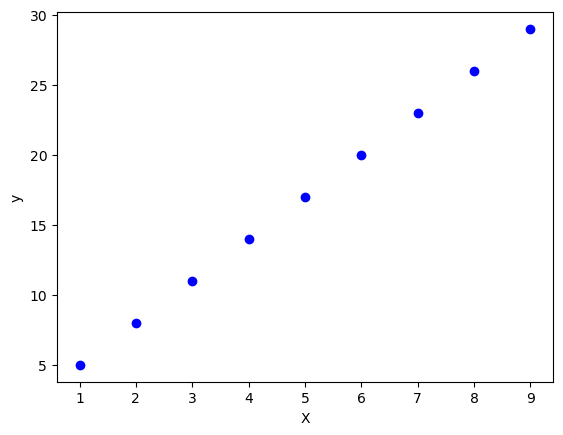

In [33]:
plt.plot(X,y,'bo')
plt.xlabel('X')
plt.ylabel('y')

# [2] 모델 구현
- 모델설계
- 모델생성
- 학습
- 평가

### [2-1] 모델설계 => 층 설정, 입력, 출력

In [34]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
lrModel=Sequential()

In [35]:
lrModel.add(Dense(1, input_shape=(1,)))
# w 매트릭스 => 1x1 , b 벡터 => 1

In [36]:
# 설계한 모델 요약 정보 확인
lrModel.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


### [2-2] 모델 생성 => 최적화 방법, 오차 계산 함수, 평가 지표설정

- 케라스에서는 최적화 , 손실함수, 평가지표를 문자열과 실제 함수 / 클래스와 맵핑되어 있음

- tensorflow.keras.optimizer.Adam
- tensorflow.keras.losses.mean_squred_error
- tensorflow.keras.metrics.mean_squred_error

- 기본값 최적화 사용

In [37]:
lrModel.compile(optimizer='adam', loss='mse',metrics=['mse','mae'])

- 사용자 설정 최적화

In [38]:
from tensorflow.keras.optimizers import Adam

In [39]:
my_adam=Adam(learning_rate=0.0005)

In [40]:
lrModel.compile(optimizer=my_adam,loss='mse',metrics=['mse','mae'])

### [3] 학습
- 매개변수 : 학습 횟수, 검증데이터 설정, 학습중단 설정, 학습과정 출력여부
- 반환값 : History객체에 학습과정에 평가결과를 저장해서 반환

In [64]:
result=lrModel.fit(X,y, epochs=1500,validation_split=0.1)

Epoch 1/1500
1/1 [==============================] - 0s 61ms/step - loss: 327.1402 - mse: 327.1402 - mae: 16.5055 - val_loss: 962.6956 - val_mse: 962.6956 - val_mae: 31.0273
Epoch 2/1500
1/1 [==============================] - 0s 29ms/step - loss: 327.0414 - mse: 327.0414 - mae: 16.5030 - val_loss: 962.4128 - val_mse: 962.4128 - val_mae: 31.0228
Epoch 3/1500
1/1 [==============================] - 0s 25ms/step - loss: 326.9430 - mse: 326.9430 - mae: 16.5005 - val_loss: 962.1309 - val_mse: 962.1309 - val_mae: 31.0182
Epoch 4/1500
1/1 [==============================] - 0s 30ms/step - loss: 326.8448 - mse: 326.8448 - mae: 16.4980 - val_loss: 961.8496 - val_mse: 961.8496 - val_mae: 31.0137
Epoch 5/1500
1/1 [==============================] - 0s 26ms/step - loss: 326.7468 - mse: 326.7468 - mae: 16.4955 - val_loss: 961.5690 - val_mse: 961.5690 - val_mae: 31.0092
Epoch 6/1500
1/1 [==============================] - 0s 23ms/step - loss: 326.6491 - mse: 326.6491 - mae: 16.4930 - val_loss: 961.2888 -

In [65]:
type(result)

keras.callbacks.History

In [66]:
result.history

{'loss': [327.1401672363281,
  327.0413818359375,
  326.9429626464844,
  326.84478759765625,
  326.746826171875,
  326.6491394042969,
  326.5515441894531,
  326.45416259765625,
  326.3568420410156,
  326.2596435546875,
  326.1624755859375,
  326.0654296875,
  325.9683532714844,
  325.8713073730469,
  325.7742919921875,
  325.6772766113281,
  325.5802307128906,
  325.483154296875,
  325.38604736328125,
  325.2889404296875,
  325.1918029785156,
  325.0945739746094,
  324.997314453125,
  324.9000244140625,
  324.8026123046875,
  324.7052307128906,
  324.60772705078125,
  324.51019287109375,
  324.41259765625,
  324.31494140625,
  324.2171936035156,
  324.119384765625,
  324.02154541015625,
  323.923583984375,
  323.82562255859375,
  323.7275695800781,
  323.62945556640625,
  323.5312805175781,
  323.43304443359375,
  323.3347473144531,
  323.23638916015625,
  323.137939453125,
  323.03948974609375,
  322.9409484863281,
  322.8423767089844,
  322.7437438964844,
  322.64501953125,
  322.546

### [3-2] 학습 후 반환값 History로 확인

In [67]:
import matplotlib.pyplot as plt

In [68]:
np.round(result.history['loss'],3)

array([327.14 , 327.041, 326.943, ..., 194.221, 194.147, 194.073])

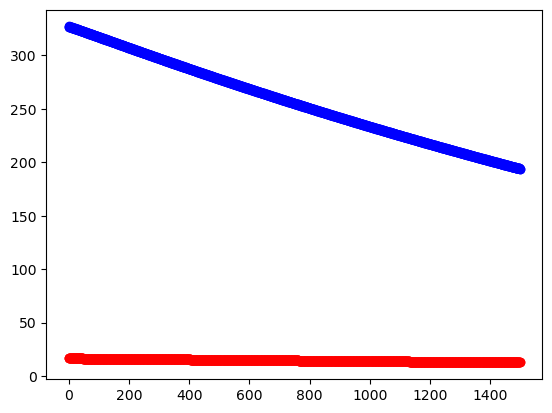

In [69]:
plt.plot(np.round(result.history['loss'],3),'bo-')
plt.plot(np.round(result.history['mae'],3),'ro-')

### [4] 평가

In [70]:
lrModel.evaluate(X,y)

1/1 [==============================] - 0s 50ms/step - loss: 236.7210 - mse: 236.7210 - mae: 13.9293


[236.7210235595703, 236.7210235595703, 13.92927360534668]

### [5] 예측

In [71]:
lrModel.predict([4])

1/1 [==============================] - 0s 92ms/step


array([[2.6014295]], dtype=float32)